# Measles Incidence in Altair

This is an example of reproducing the Wall Street Journal's famous [Measles Incidence Plot](http://graphics.wsj.com/infectious-diseases-and-vaccines/#b02g20t20w15) in Python using [Altair](http://github.com/ellisonbg/altair/).

## The Data

We'll start by downloading the data. Fortunately, others have made the data available in an easily digestible form; a github search revealed the dataset in CSV format here:

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/blmoore/blogR/master/data/measles_incidence.csv'
data = pd.read_csv(url, skiprows=2, na_values='-')
data.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


## Data Munging with Pandas

This data needs to be cleaned-up a bit; we can do this with the Pandas library.
We first need to aggregate the incidence data by year:

In [3]:
annual = data.drop('WEEK', axis=1).groupby('YEAR').sum()
annual.head()

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
YEAR,,,,,,,,,,,,,,,,,,,,,
1928,334.99,NaN,200.75,481.77,69.22,206.98,634.95,256.02,535.63,119.58,...,160.16,315.43,97.35,16.83,334.80,NaN,344.82,195.98,124.61,227.00
1929,111.93,NaN,54.88,67.22,72.80,74.24,614.82,239.82,94.20,78.01,...,167.77,33.04,71.28,68.90,105.31,NaN,248.60,380.14,1016.54,312.16
1930,157.00,NaN,466.31,53.44,760.24,1132.76,112.23,109.25,182.10,356.59,...,346.31,179.91,73.12,1044.79,236.69,NaN,631.64,157.70,748.58,341.55
1931,337.29,NaN,497.69,45.91,477.48,453.27,790.46,1003.28,832.99,260.79,...,212.36,134.79,39.56,29.72,318.40,NaN,197.43,291.38,506.57,60.69
1932,10.21,NaN,20.11,5.33,214.08,222.90,348.27,15.98,53.14,13.63,...,96.37,68.99,76.58,13.91,1146.08,53.4,631.93,599.65,935.31,242.10


Next, because Altair is built to handle data where each row corresponds to a single sample, we will stack the data, re-labeling the columns for clarity:

In [4]:
stacked = annual.stack().reset_index()
stacked.columns = ['year', 'state', 'incidence']
stacked.head()

,year,state,incidence
0,1928,ALABAMA,334.99
1,1928,ARIZONA,200.75
2,1928,ARKANSAS,481.77
3,1928,CALIFORNIA,69.22
4,1928,COLORADO,206.98


## Initial Visualization

Now we can use Altair's syntax for generating a heat map:

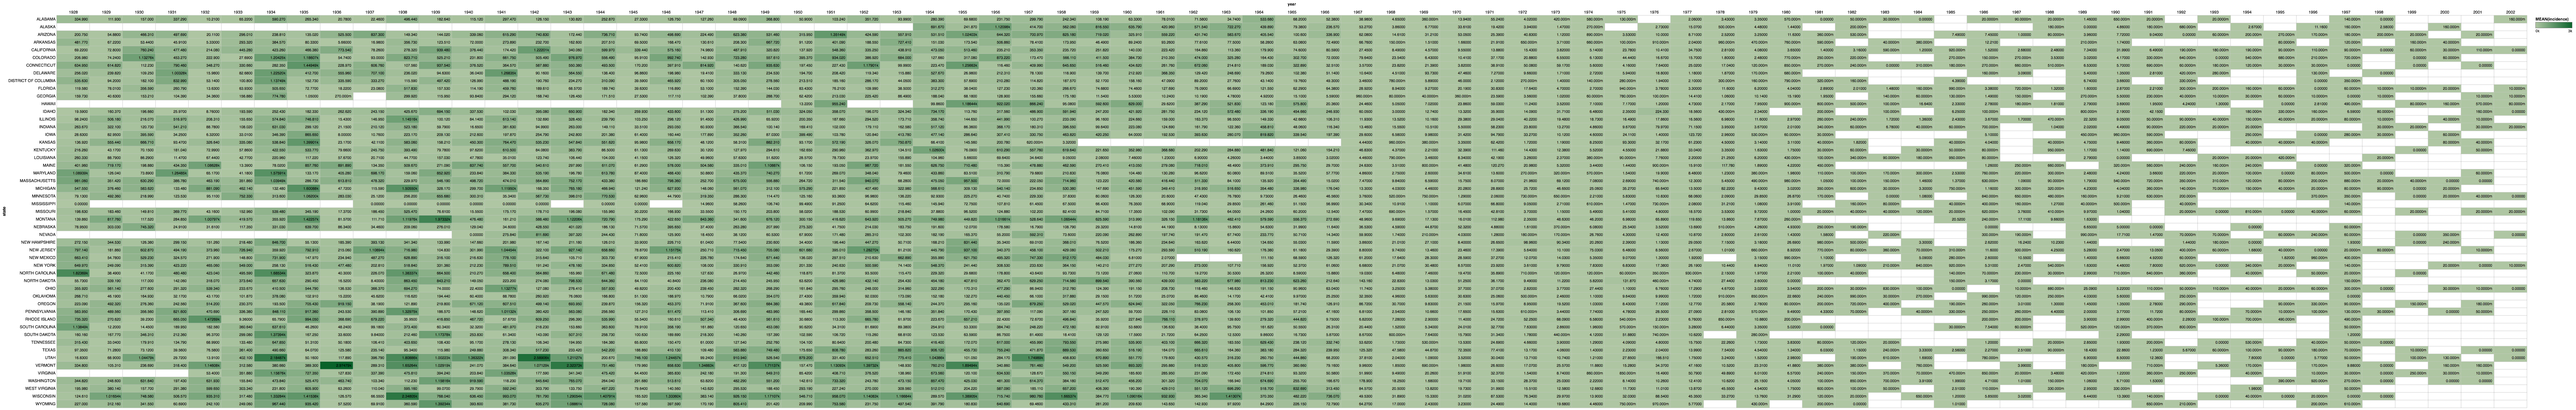

In [5]:
from altair import *

Chart(stacked).mark_text(
    applyColorToBackground=True
).encode(
    column='year',
    row='state',
    color='mean(incidence)',
    text='mean(incidence)'
)

## Adjusting Aesthetics

All operative components of the visualization appear above, we now just have to adjust the aesthetic features to reproduce the original plot.
Altair allows a wide range of flexibility for such adjustments, including size and color of markings, axis labels and titles, and more.

Here is the data visualized again with a number of these adjustments:

In [6]:
# Define a custom colormape using Hex codes & HTML color names
colormap = Scale(domain=['nan', 0, 100, 200, 350, 1000, 3000],
                 range=['white', '#F0F8FF', 'cornflowerblue',
                        'mediumseagreen', '#FFEE00', 'darkorange', 'firebrick'])

# Define our chart with aesthetic customizations
chart = Chart(stacked).mark_text(
    applyColorToBackground=True,
).encode(
    Column('year',
           axis=Axis(values=list(range(1930, 2010, 10)),
                     title=' ')),
    Row('state',
        axis=Axis(title=' ')),
    Color('sum(incidence)', scale=colormap,
          legend=Legend(title='Measles Incidence',
                        values=[0, 1000, 2000, 3000])),
    Text(value=' ')
).configure_scale(
    textBandWidth=10,
    bandSize=10
)

In [7]:
json = chart.to_dict()

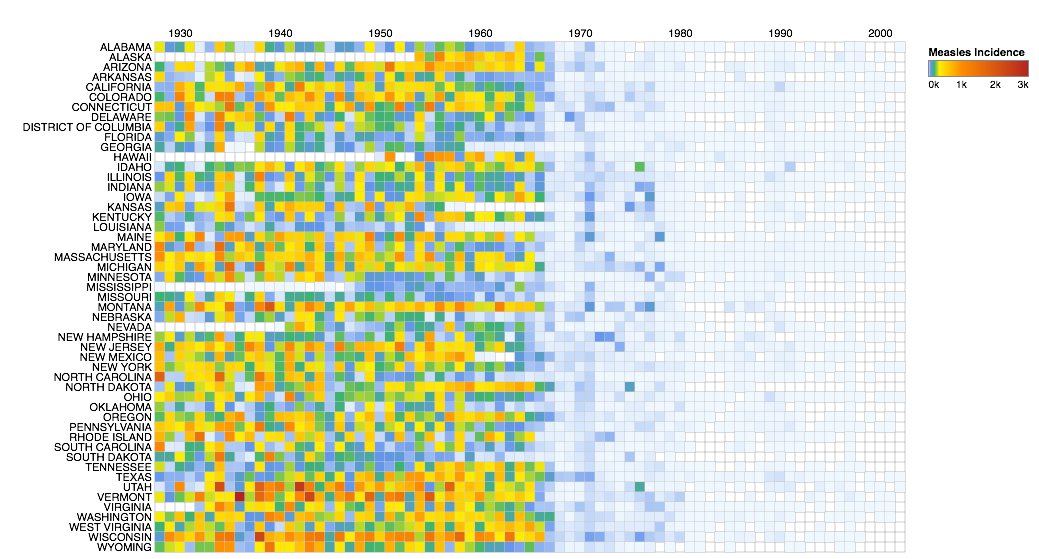

In [8]:
chart2 = Chart.from_dict(json)
chart2.display()

The result clearly shows the impact of the the measles vaccine introduced in the mid-1960s.